In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp

# Q1

In [2]:
df = pd.read_excel('DepartmentStoreSales_test 2 data.xlsx')
df.head()

,Quarter,Sales,% to target
0,1,50147,87
1,2,49325,91
2,3,57048,89
3,4,76781,79
4,5,48617,86


In [3]:
df.shape

(24, 3)

In [4]:
df.Sales.describe()

count        24.000000
mean      64757.375000
std       14961.523379
min       48617.000000
25%       52681.000000
50%       59440.000000
75%       76835.000000
max      103337.000000
Name: Sales, dtype: float64

In [5]:
bootstrap = pd.DataFrame({'avg_price':[df.sample(10000, replace=True,random_state=i+1).Sales.mean() for i in range(24)]})
print(bootstrap.shape)
print(bootstrap.avg_price.mean())
print(df.Sales.mean())

(24, 1)
64812.71748333332
64757.375


<AxesSubplot:>

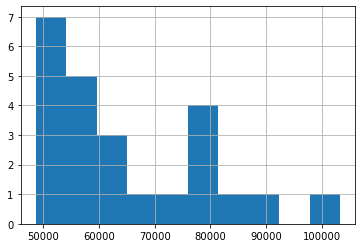

In [6]:
df.Sales.hist()

# Q2

Null Hypothesis: average sales of bootstrap and original are equal

Alternative Hypothesis: they are not equal

In [7]:
from scipy import stats as st
from statsmodels.stats import weightstats as stests

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [8]:
st.ttest_ind(bootstrap,df.Sales,equal_var=True)

Ttest_indResult(statistic=array([0.0181208]), pvalue=array([0.98562086]))

In [9]:
stests.ztest(bootstrap,df.Sales, value= 0)

(array([0.0181208]), array([0.98554249]))

Ans: The p-value is so large that we cannot reject the null hypothesis. Thus, the two means are equal

# Q3

In [10]:
df['Sales_target'] = df['Sales']/df['% to target']
df.head()

,Quarter,Sales,% to target,Sales_target
0,1,50147,87,576.402299
1,2,49325,91,542.032967
2,3,57048,89,640.988764
3,4,76781,79,971.911392
4,5,48617,86,565.313953


In [11]:
avg = df['% to target'].mean()
std = df['% to target'].std()
num_reps = 200
num_sim =500

In [12]:
all_stats = []
for i in range(num_sim):
    sales_tgt = np.random.choice(df['Sales_target'],num_reps)
    percentage = np.random.normal(avg,std,num_reps)
    tmp = pd.DataFrame({'pct_to_target': percentage,
                        'sales_target': sales_tgt})
    tmp['sales'] = tmp.pct_to_target * tmp.sales_target
    all_stats.append([tmp['sales'].mean(),tmp['pct_to_target'].mean(),tmp['sales_target'].mean()])

In [13]:
results = pd.DataFrame(all_stats, columns=['sales', 'pct_to_target', 'sales_target'])                    
results.head()

,sales,pct_to_target,sales_target
0,65236.459022,86.100322,758.039075
1,67311.714229,86.656032,775.921845
2,64238.067826,87.089983,736.946172
3,66491.663735,86.800016,765.714626
4,65119.111000,86.296373,755.467542


<AxesSubplot:>

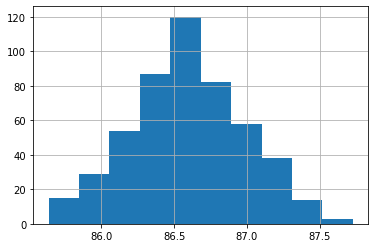

In [14]:
results.pct_to_target.hist()

In [15]:
results.pct_to_target.quantile(.025),results.pct_to_target.quantile(.975)

(85.78031408867317, 87.34112573555427)

For 95% confidence level, the percentage to target is between 85.7995% and 87.4062%.